<a href="https://colab.research.google.com/github/Nagendra320/Netflix-Content-Analysis/blob/main/Netflix_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Netflix***

---


Netflix's transformation of the entertainment landscape has been marked by its evolution from humble beginnings with DVD mail rentals to becoming a leader in the streaming world. It is fascinating to observe how it has constantly adapted, shaping itself to fit our ever-changing viewing habits. An unrivaled variety of content, which combines original creations and handpicked favorites from around the world, is delivered by Netflix today, speaking many languages and crossing genre boundaries.

By January 2024, over 260 million subscribers had been impressively gathered by Netflix across more than 190 countries. This staggering number stands as a testament to its universal appeal and its role in shaping not just what we watch but how we talk about culture and entertainment on a global scale.

A closer look at Netflix's vast collection is taken in this piece through a detailed exploratory data analysis (EDA). A journey is embarked upon, exploring a dataset rich with titles, spanning various categories such as 'show_id', 'type' (differentiating Movies from TV Shows), 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'genre', and 'description'. Through this exploration, the aim is to uncover the patterns and trends that highlight Netflix's approach to content, its international reach, the diversity of its genres, and how entertainment preferences have evolved.

Embark on this analytical journey with us to delve into the details of Netflix's offerings and discover what they indicate about the broader trends in the entertainment landscape.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Netflix= pd.read_csv('/content/drive/MyDrive/netflix.csv')

**Getting to Know Our Data**


---


Before diving into the deep end of analysis, the first step is taken to get a good look at the data we're working with. In our case, this means that we are familiarizing ourselves with the types of information stored in our dataset. A preliminary peek is given to help us understand the structure of our data. By examining the first few entries in our dataset, we become acquainted with what each column represents—from the title of a show to its director, and cast, all the way to its description and more.

This step is crucial because it sets the stage for everything that follows. It helps identify what pieces of information we have to work with, any missing data, and the quality of the data we are analyzing. With a clearer understanding, we then delve deeper into the specifics of the dataset.

Our next steps involve a closer examination of the dataset's composition, such as the identification of the types of data we are dealing with and ensuring we have a complete picture by checking for any missing values. A moment is also taken to understand the scale and diversity of our dataset by looking at statistics like average values and standard deviations, which give insights into the variability and central tendency of numerical data. Additionally, by exploring the dataset's categorical data, unique values and frequent occurrences that might hint at trends or patterns are uncovered.

Understanding the overall shape of our dataset, including the number of entries and columns, prepares us for more detailed analysis. This preparation is rounded off by identifying any gaps in our data, ensuring we are aware of areas that might require special attention or treatment before moving forward.

In [3]:
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print(Netflix.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [5]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
Netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
Netflix.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
Netflix.shape

(8807, 12)

In [9]:
Netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

To keep our analysis smooth and insightful, some changes have been made to the data, particularly in how dates are handled. The 'date_added' column has been converted into a more versatile datetime format, setting us up to accurately track when shows and movies are added to Netflix. Additionally, the 'release_year' has been given the datetime treatment, allowing for more precise comparisons, contrasts, and analyses of content timelines. These modifications, though minor, are powerful in ensuring readiness to identify trends and insights in Netflix's dataset.

In [10]:
Netflix['date_added']=pd.to_datetime(Netflix['date_added'], format='mixed')
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


Exploring Netflix's collection, we've found that Netflix's library takes us on a journey, spanning nearly a century of entertainment history, from the classics of 1925 to the latest releases of 2021. It's a testament to how they blend timeless classics with contemporary hits, ensuring there's something for everyone.

In [12]:
print("From",Netflix['release_year'].min(),end=' ')
print('To',Netflix['release_year'].max())
print('Time span:',Netflix['release_year'].max()-Netflix['release_year'].min())

From 1925 To 2021
Time span: 96


Diving into the mix of content on Netflix, we find an intriguing balance: about 70% of the offerings are movies, while the remaining 30% are TV shows. This ratio sheds light on Netflix's strategy, highlighting its emphasis on providing a rich selection of films alongside a substantial variety of series.

In [13]:
Netflix['type'].value_counts(normalize=True)*100

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

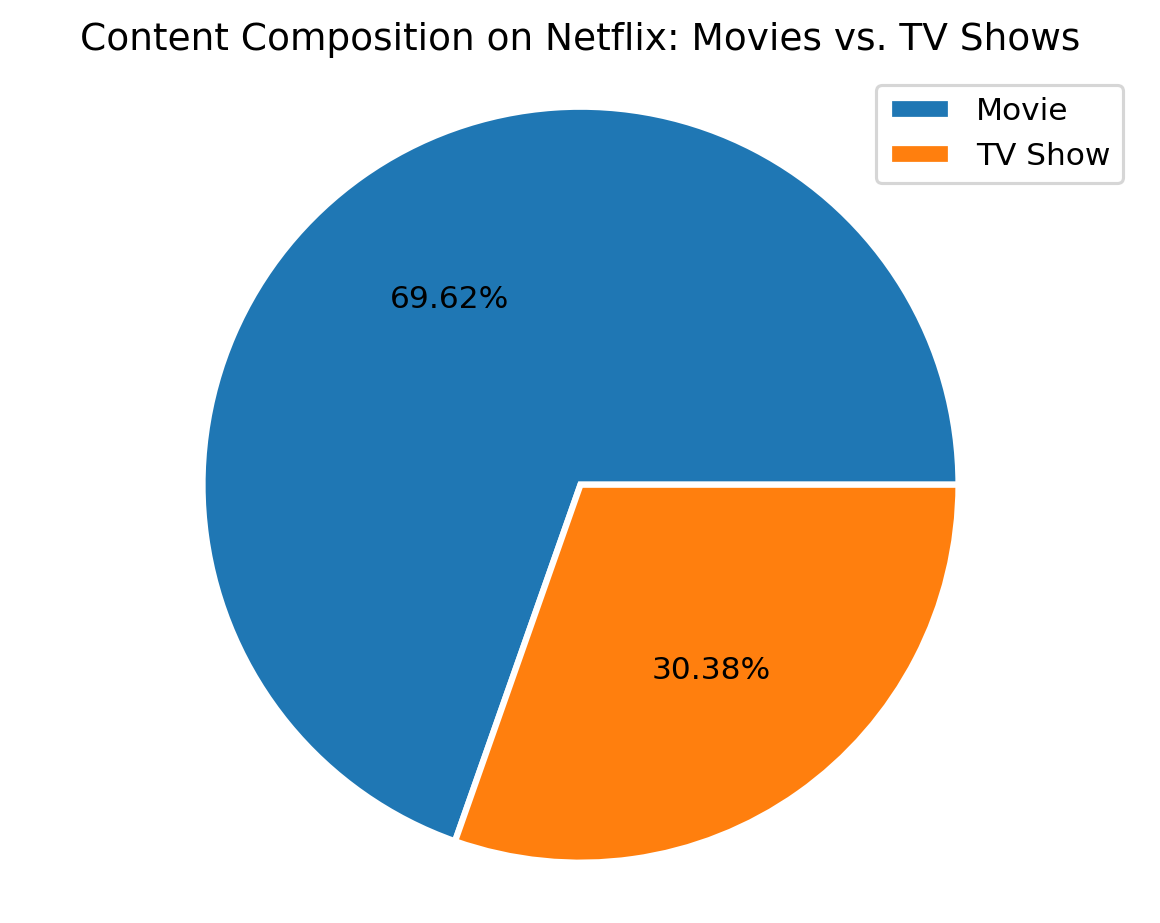

In [14]:
# Create a figure and a single subplot
fig,axs=plt.subplots(dpi=15**2)

# Pie chart
axs.pie(x=Netflix['type'].value_counts(),autopct='%.2f%%',wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Display title
axs.set_title('Content Composition on Netflix: Movies vs. TV Shows')
axs.axis('equal')

# Legend
axs.legend(Netflix['type'].value_counts().index)

# Display the plot
plt.show()

In delving into the intricate tapestry of Netflix's expansive library, a meticulous process is undertaken to unravel the nested complexities within the dataset. Starting with the pivotal attributes of each title—director, cast, country, and genres—each element is initially treated as a singular string. This string, often encapsulating multiple names or countries, is split into separate entities, each representing a unique contributor or characteristic of the film or show. This transformation is methodically applied across the specified columns, transforming each from a compacted list into an expansive, one-dimensional array that lays out each element distinctly.

Subsequently, the dataset undergoes an 'explosion', where each entry in these arrays spawns a separate row, maintaining all other attributes of the title intact. This explosion not only multiplies the dataset in terms of sheer volume but also enhances the granularity, allowing for a more nuanced analysis of Netflix's offerings. The process concludes with a resetting of the index, ensuring that the newly expanded dataset is tidy and sequential, thereby making it easier to navigate and analyze. This refined dataset not only reflects the meticulous care invested in its preparation but also mirrors the diversity and breadth of Netflix’s content, showcasing an array of talents, origins, and genres that cater to a global audience.

In [15]:
Netflix_unnested=Netflix.copy()
Netflix_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
nested_columns=['director','cast','country','listed_in']

#Loop over each column and unnesting the data.
for col in nested_columns:
        Netflix_unnested[col]=Netflix_unnested[col].apply(lambda x:str(x).split(', '))
        Netflix_unnested=Netflix_unnested.explode(col)

#Reseting the index.
Netflix_unnested.reset_index(drop=True,inplace=True)
Netflix_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [17]:
Netflix_unnested.shape

(201991, 12)

In [18]:
Netflix_unnested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201991 non-null  object        
 1   type          201991 non-null  object        
 2   title         201991 non-null  object        
 3   director      201991 non-null  object        
 4   cast          201991 non-null  object        
 5   country       201991 non-null  object        
 6   date_added    201833 non-null  datetime64[ns]
 7   release_year  201991 non-null  int64         
 8   rating        201924 non-null  object        
 9   duration      201988 non-null  object        
 10  listed_in     201991 non-null  object        
 11  description   201991 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


Following the expansion and restructuring of the dataset, the focus shifts to enhancing the integrity of the data by addressing the presence of null values, indicated as 'nan' strings. In this crucial step, these placeholder strings are meticulously replaced with `np.nan`, a marker used by pandas to denote missing data. This replacement standardizes the dataset, aligning it with typical data handling practices in Python, which facilitates more robust data manipulation and analysis techniques moving forward.

With the dataset now properly formatted, the stage is set for the subsequent phase—imputing these null values. Here, thoughtful strategies will be employed to fill these gaps with appropriate substitutes, thereby ensuring that each attribute in every record is complete. This process not only preserves the dataset's comprehensive nature but also enhances its utility for generating insightful, reliable analyses.

In [19]:
#Replacing 'nan' with np.nan
Netflix_unnested.replace(to_replace=['nan'],value=[np.nan],inplace=True)

In [20]:
Netflix_unnested.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

In [21]:
Netflix_unnested['director'].fillna('Unknown Director',inplace=True)
Netflix_unnested['cast'].fillna('Unknown Actor',inplace=True)
Netflix_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [22]:
Netflix_unnested.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

In [23]:
Netflix_unnested['rating'].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64


In an insightful approach to handling discrepancies within the dataset, the code above addresses an anomaly where the values intended for the 'duration' column are erroneously placed in the 'rating' column. Specifically, the operation identifies entries where 'duration' is missing and strategically replaces these null values with the corresponding erroneous entries from the 'rating' column. This move ensures that 'duration' accurately reflects the intended data.

Subsequently, the script filters and identifies any entries within the 'rating' column that erroneously contain time durations (indicated by the presence of "min"). These misclassified entries are then rectified by setting them to `np.nan`, thus cleaning the 'rating' column to maintain its integrity as a categorical descriptor of content maturity. This meticulous correction process underscores the importance of maintaining precise and accurate data categorization, which is crucial for subsequent analysis and reporting.

In [24]:
Netflix_unnested.loc[Netflix_unnested['duration'].isnull(),'duration']=Netflix_unnested.loc[Netflix_unnested['duration'].isnull(),'rating']
Netflix_unnested.loc[Netflix_unnested['rating'].str.contains('min',na=False),'rating']=np.nan

In [25]:
Netflix_unnested.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11897
date_added        158
release_year        0
rating             70
duration            0
listed_in           0
description         0
dtype: int64

In [26]:
Netflix_unnested['rating'].fillna('NR',inplace=True)

In [27]:
Netflix_unnested.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11897
date_added        158
release_year        0
rating              0
duration            0
listed_in           0
description         0
dtype: int64

In this step, the cleaning process addresses the missing values in the 'date_added' column of the dataset. The code first identifies unique years where the 'date_added' information is missing. For each identified year, the most frequently occurring 'date_added' value for that year is determined (the mode). It then fills the missing 'date_added' entries with this most common value, but only for those records that match the specific release year. This approach assumes that the most common addition date in a given year is a plausible substitute for missing values from the same year, thus ensuring continuity and reducing data sparsity without introducing arbitrary biases.<

In [28]:
years_null=Netflix_unnested.loc[Netflix_unnested['date_added'].isnull(),'release_year'].unique()

for i in years_null:
    x=Netflix_unnested.loc[Netflix_unnested['release_year']==i,'date_added'].mode().values[0]
    Netflix_unnested.loc[((Netflix_unnested['date_added'].isnull()) & (Netflix_unnested['release_year']==i)),'date_added']=x

In [29]:
Netflix_unnested.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11897
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
dtype: int64

In this process, an attempt is made to address the missing country data in the dataset by linking it with directors and cast members whose country of origin is known. Initially, the unique directors associated with missing 'country' values are identified. If these directors are also associated with non-null 'country' entries elsewhere in the dataset, the most frequent country associated with each director (the mode) is used to fill in the missing country values for all entries by that director.

If country values remain missing after considering the directors, a similar approach is used with the cast members. The cast members associated with missing country values are cross-referenced with those appearing in entries with known countries. Where matches occur, the most common country associated with these cast members is used to impute missing country data. This method relies on the assumption that the directors and cast members generally work in productions from their respective countries, making it a logical basis for filling in missing data points.

In [30]:
dir_country_null=Netflix_unnested.loc[Netflix_unnested['country'].isnull(),'director'].unique()
dir_country=Netflix_unnested.loc[~Netflix_unnested['country'].isnull(),'director'].unique()

for i in dir_country_null:
    if i in dir_country:
        x=Netflix_unnested.loc[Netflix_unnested['director']==i,'country'].mode().values[0]
        Netflix_unnested.loc[(Netflix_unnested['country'].isnull()) & (Netflix_unnested['director']==i),'country']=x

In [31]:
Netflix_unnested.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         4276
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [32]:
cast_country_null=Netflix_unnested.loc[Netflix_unnested['country'].isnull(),'cast'].unique()
cast_country=Netflix_unnested.loc[~Netflix_unnested['country'].isnull(),'cast'].unique()

for i in cast_country_null:
    if i in cast_country:
        x=Netflix_unnested.loc[Netflix_unnested['cast']==i,'country'].mode().values[0]
        Netflix_unnested.loc[(Netflix_unnested['country'].isnull()) & (Netflix_unnested['cast']==i),'country']=x

In [33]:
Netflix_unnested.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country         2069
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


In this final stage of data cleaning, a straightforward method is employed to manage the remaining missing values in the 'country', 'director', and 'cast' columns of the dataset. Specifically, any entries that still lack a country after the previous imputation attempts are uniformly set to 'Unknown'. This approach ensures that no data points are left blank, which can facilitate smoother analysis and visualization steps later.

Similarly, for the 'director' and 'cast' columns, any remaining null values are filled with placeholder strings: 'Unknown Director' and 'Unknown Actor', respectively. This uniformity not only avoids complications due to missing data but also maintains a consistent format across the dataset.

In [34]:
Netflix_unnested['country'].fillna('Unknown',inplace=True)

In [35]:
Netflix_unnested.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In the concluding steps of restructuring the Netflix dataset, several key transformations are performed to prepare the data for in-depth analysis. Initially, the 'duration' column is refined to segregate the content into two types: films, measured in minutes, and TV shows, counted in seasons. This categorization helps in differentiating content duration more effectively. To accommodate this, the duration values originally in minutes are converted into more accessible labels such as '1hr', '2hrs', etc., while the season-based duration for TV shows is directly adopted from the modified 'seasons' column.

Simultaneously, the dataset undergoes a textual cleanup where regional indicators in the titles are removed, ensuring a uniform format across the database. Finally, the data is enhanced by introducing a 'decade' categorization for the release years, using bins that represent each decade from the 1920s to the 2020s. This allows for a segmented historical analysis, helping to uncover trends and shifts in content over nearly a century. The inclusion of this temporal dimension enriches the dataset, offering insights into the evolution of entertainment content in response to changes in viewer preferences, technological advancements, and cultural shifts.

In [36]:
Netflix_unnested['seasons']=Netflix_unnested['duration'].copy()
Netflix_unnested.loc[Netflix_unnested['seasons'].str.contains('min'),'seasons']=0
Netflix_unnested['duration']=Netflix_unnested['duration'].str.replace(' min','')

In [37]:
Netflix_unnested.loc[Netflix_unnested['duration'].str.contains('Season'),'duration']=0
Netflix_unnested['duration']=Netflix_unnested['duration'].astype('int')
Netflix_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,0,International TV Shows,"After crossing paths at a party, a Cape Town t...",2 Seasons
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,0,TV Dramas,"After crossing paths at a party, a Cape Town t...",2 Seasons
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,0,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2 Seasons
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,0,International TV Shows,"After crossing paths at a party, a Cape Town t...",2 Seasons


In [38]:
mins=[-1,0, 60, 120, 180, 240, 300, 360]
runtime=['<1','1hr','2hrs','3hrs','4hrs','5hrs','6hrs']
Netflix_unnested['duration']=pd.cut(Netflix_unnested['duration'], bins=mins, labels=runtime)

Netflix_unnested['duration']=Netflix_unnested['duration'].astype(str)

In [39]:
Netflix_unnested.loc[Netflix_unnested['duration'].str.contains('<1'),'duration']=Netflix_unnested['seasons']
Netflix_unnested.drop(columns='seasons',inplace=True)

In [40]:
Netflix_unnested['title']=Netflix_unnested['title'].str.replace(r'\(\w+ Version\)', '', regex=True, case=False)
Netflix_unnested['title']=Netflix_unnested['title'].str.replace('(Telugu)', '', regex=True, case=False)
Netflix_unnested['title']=Netflix_unnested['title'].str.replace('(Malayalam)', '', regex=True, case=False)
Netflix_unnested['title']=Netflix_unnested['title'].str.replace('(Tamil)', '', regex=True, case=False)
Netflix_unnested['title']=Netflix_unnested['title'].str.replace('(Hindi)', '', regex=True, case=False)
Netflix_unnested['title']=Netflix_unnested['title'].str.replace('(English)', '', regex=True, case=False)

In [41]:
Netflix_unnested.shape

(201991, 12)

In [42]:
Netflix_unnested.groupby('country').agg(Content=('title','nunique')).index #.nlargest(20,'title')

Index(['', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Kingdom,', 'United States', 'United States,', 'Unknown',
       'Uruguay', 'Vatican City', 'Venezuela', 'Vietnam', 'West Germany',
       'Zimbabwe'],
      dtype='object', name='country', length=128)

In [43]:
Netflix_unnested.loc[Netflix_unnested['country']=='','country']='Unknown'
Netflix_unnested['country']=Netflix_unnested['country'].str.replace(',','')

In [44]:
bins = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030]
labels = ["20's","30's","40's","50's","60's","70's", "80's", "90's", "2000's", "2010's","2020's"]
Netflix_unnested['decade']=pd.cut(Netflix_unnested['release_year'],bins=bins,labels=labels)
Netflix_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,2hrs,Documentaries,"As her father nears the end of his life, filmm...",2010's
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2020's
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2020's
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2020's
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2020's


# Univariate Analysis

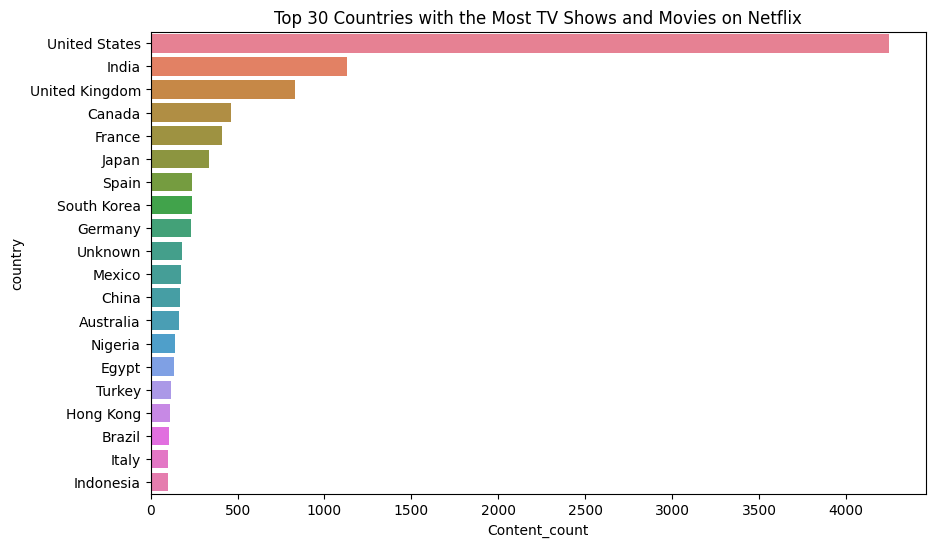

In [45]:
# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Barplot
sns.barplot(data=Netflix_unnested.groupby('country').agg(Content_count=('title','nunique')).nlargest(20,'Content_count'),y='country',x='Content_count',hue='country', legend=False)

# Display title
axs.set_title('Top 30 Countries with the Most TV Shows and Movies on Netflix')

# Display the plot
plt.show()

A bar plot has been used to illustrate the distribution of Netflix content across the top 20 countries, highlighting the vast array of unique titles available and showcasing the global reach and diversity of Netflix's library. The United States dominates with 4246 titles, underscoring its central role in entertainment, followed by significant contributions from India and the United Kingdom, reflecting Netflix's strategy to cater to both local and international audiences. Other notable contributors include Canada, France, Japan, South Korea, and Nigeria, each enriching the platform with diverse cultural narratives, indicative of Netflix's effort to appeal to global tastes and niche markets alike.

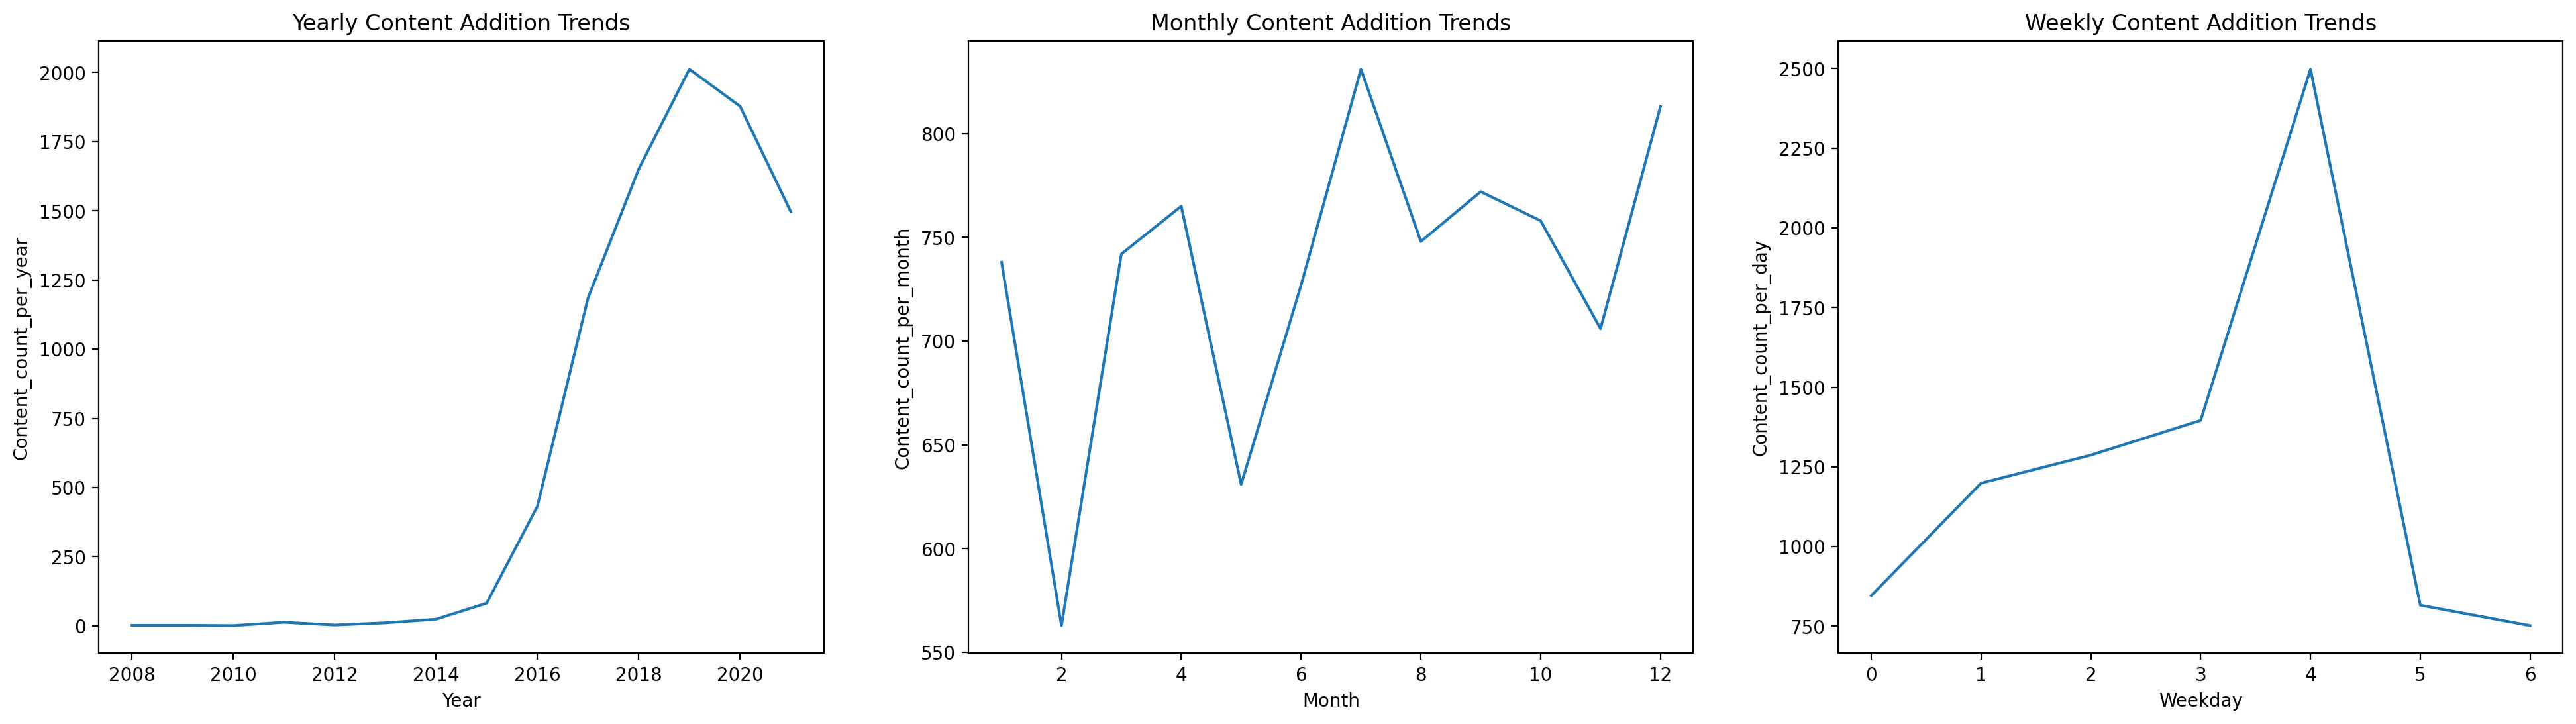

In [46]:
# Create a figure and a single subplot
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(24,6),dpi=200)

# lineplot
sns.lineplot(data=Netflix_unnested.groupby(Netflix_unnested['date_added'].dt.year).agg(Content_count_per_year=('title','nunique')).reset_index(),x='date_added',y='Content_count_per_year',ax=axs[0])
sns.lineplot(data=Netflix_unnested.groupby(Netflix_unnested['date_added'].dt.month).agg(Content_count_per_month=('title','nunique')).reset_index(),x='date_added',y='Content_count_per_month',ax=axs[1])
sns.lineplot(data=Netflix_unnested.groupby(Netflix_unnested['date_added'].dt.dayofweek).agg(Content_count_per_day=('title','nunique')).reset_index(),x='date_added',y='Content_count_per_day',ax=axs[2])

# Display title
axs[0].set_title('Yearly Content Addition Trends')
axs[1].set_title('Monthly Content Addition Trends')
axs[2].set_title('Weekly Content Addition Trends')

#labels
axs[0].set_xlabel('Year')
axs[1].set_xlabel('Month')
axs[2].set_xlabel('Weekday')

# Display the plot
plt.show()

The data extracted from the Netflix dataset indicates noteworthy patterns in the addition of content across different time periods—annually, monthly, and by day of the week. These patterns are visualized through line plots, providing a visual representation of content distribution dynamics over time.

1. **Annual Content Additions:**
   A dramatic increase in the number of unique titles added to Netflix annually from 2008 to 2021 is shown in the line plot. In the initial years up to 2014, only a few titles were added each year. A sharp increase is observed starting from 2015, reaching a peak in 2019 with 2012 new titles. Following 2019, a decline is noted, though the figures remain significantly higher compared to the early years. This trend is likely indicative of Netflix's increased investment in original content and its strategy to expand its share in the global streaming market.

2. **Monthly Content Additions:**
   The monthly distribution of content additions is characterized by consistent patterns with peaks during certain months. The highest number of new titles is added in July (831), suggesting strategic content refreshes to captivate viewers during summer vacations in many countries. The lowest additions are seen in February (563), possibly affected by the month's shorter duration. The plot typically illustrates how content release strategies might be aligned with viewer availability and major holidays throughout the year.

3. **Weekly Content Additions:**
   Insights into the specific days when Netflix tends to add new titles are revealed by analyzing the day of the week. The highest number of new titles being added is observed on Fridays (2498), strategically positioned to capture viewer attention during the weekends when they likely have more leisure time. The least number of additions occurs on Sundays, indicating a buildup of releases as the week progresses, peaking as it approaches the weekend.

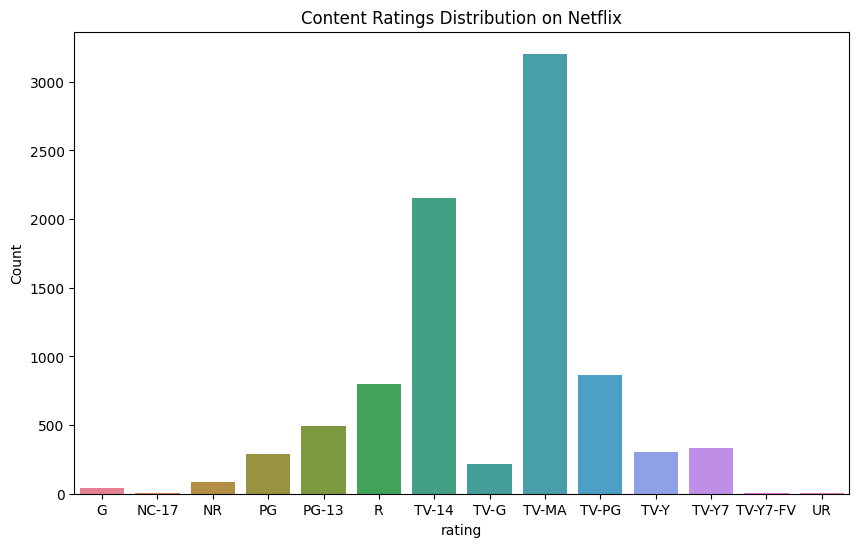

In [47]:
# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Barplot
sns.barplot(data=Netflix_unnested.groupby('rating').agg(Count=('title','nunique')).reset_index(),y='Count',x='rating',hue='rating')

# Display title
axs.set_title('Content Ratings Distribution on Netflix')

# Display the plot
plt.show()

A bar plot was utilized to depict the distribution of Netflix content across different rating categories. The visualization highlights how content is categorized from general audiences to adult-specific ratings. Notably, TV-MA, designed for mature audiences, leads with 3,204 titles, reflecting Netflix’s extensive library aimed at adults. Following this, TV-14 content, suitable for viewers over 14 years old, counts 2,152 titles, supporting a diverse viewing experience for teens and young adults. The plot also shows a significant number of titles rated PG-13 and R, catering to a broader audience with varied content preferences. This distribution aids in understanding the target demographics of Netflix’s content strategy, showcasing their aim to cater to diverse viewer age groups with an array of thematic and maturity levels.

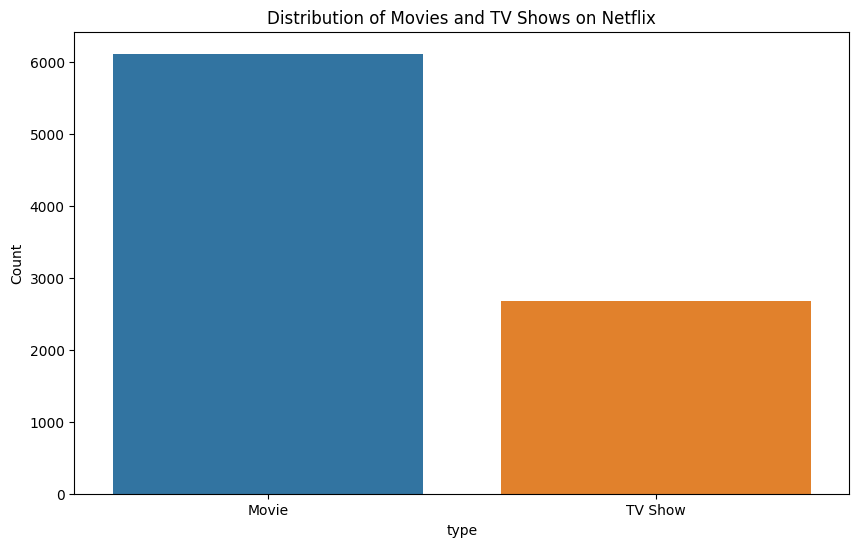

In [48]:
# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Barplot
sns.barplot(data=Netflix_unnested.groupby('type').agg(Count=('title','nunique')).reset_index(),y='Count',x='type',hue='type')

# Display title
axs.set_title('Distribution of Movies and TV Shows on Netflix')

# Display the plot
plt.show()

A bar plot was employed to visually represent the distribution of content types on Netflix, specifically comparing the total number of unique movies and TV shows available on the platform. The plot clearly delineates that movies significantly outnumber TV shows, with 6,116 unique titles categorized as movies and 2,676 as TV shows. This distinction underscores Netflix's extensive focus on offering a diverse movie library alongside its investment in serialized content. The visualization effectively captures the scope of Netflix's offerings, providing insights into the platform's strategy to balance film and television content to cater to varied audience preferences.

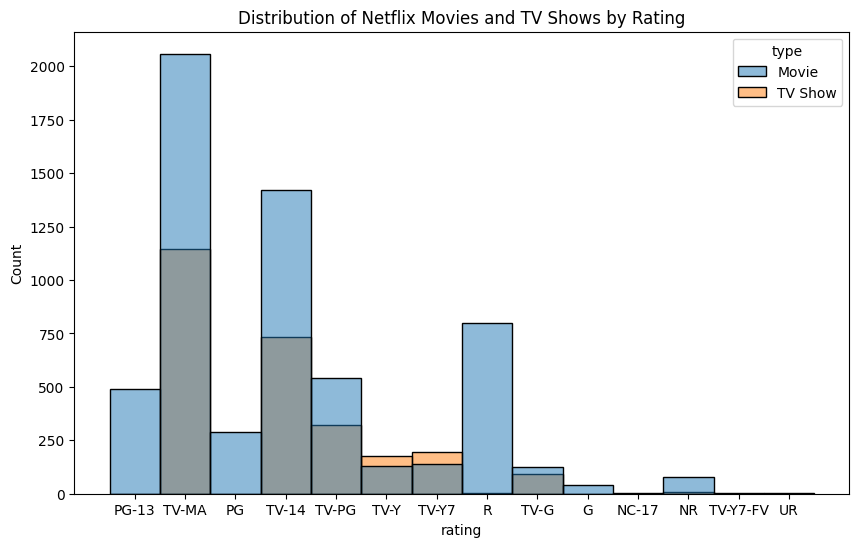

In [49]:
# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Histplot
sns.histplot(data=Netflix_unnested[['type','title','rating']].drop_duplicates(),x='rating',hue='type')

# Display title
axs.set_title('Distribution of Netflix Movies and TV Shows by Rating')

# Display the plot
plt.show()

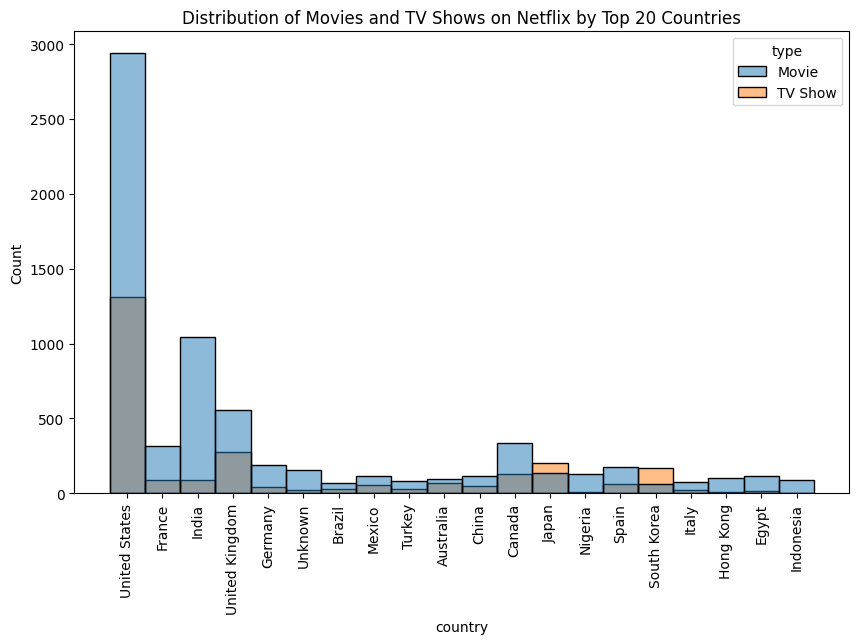

In [50]:
top_20_countries=Netflix_unnested.groupby('country').agg(Content_count=('title','nunique')).nlargest(20,'Content_count').index.tolist()
unique_titles=Netflix_unnested[['type','title','country']].drop_duplicates()

# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Histplot
sns.histplot(data=unique_titles.loc[unique_titles['country'].isin(top_20_countries)],x='country',hue='type')

# Display title
axs.set_title('Distribution of Movies and TV Shows on Netflix by Top 20 Countries')

# Ticks
plt.xticks(rotation=90)

# Display the plot
plt.show()

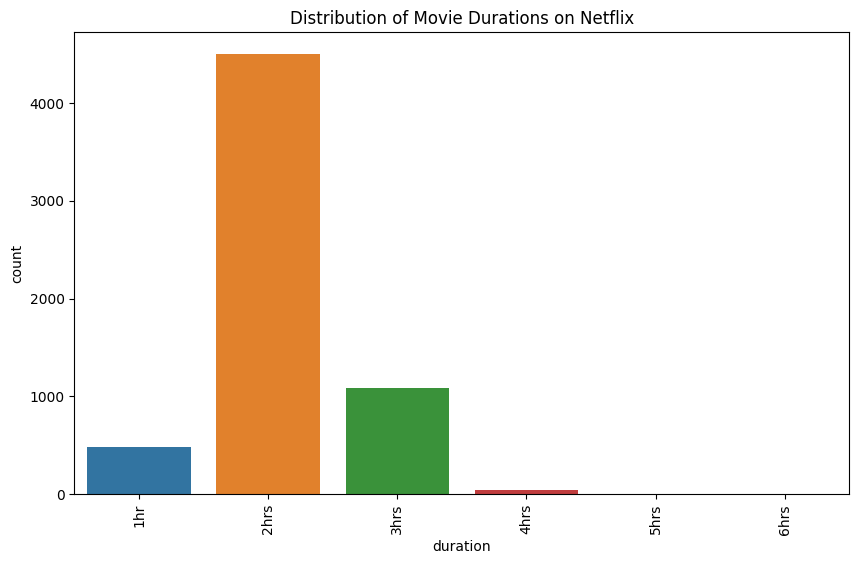

In [51]:
# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Barplot
sns.barplot(data=Netflix_unnested.groupby('type').get_group('Movie').groupby('duration').agg(count=('title','nunique')),x='duration',y='count',hue='duration')

# Display title
axs.set_title('Distribution of Movie Durations on Netflix')

# Ticks
plt.xticks(rotation=90)

# Display the plot
plt.show()

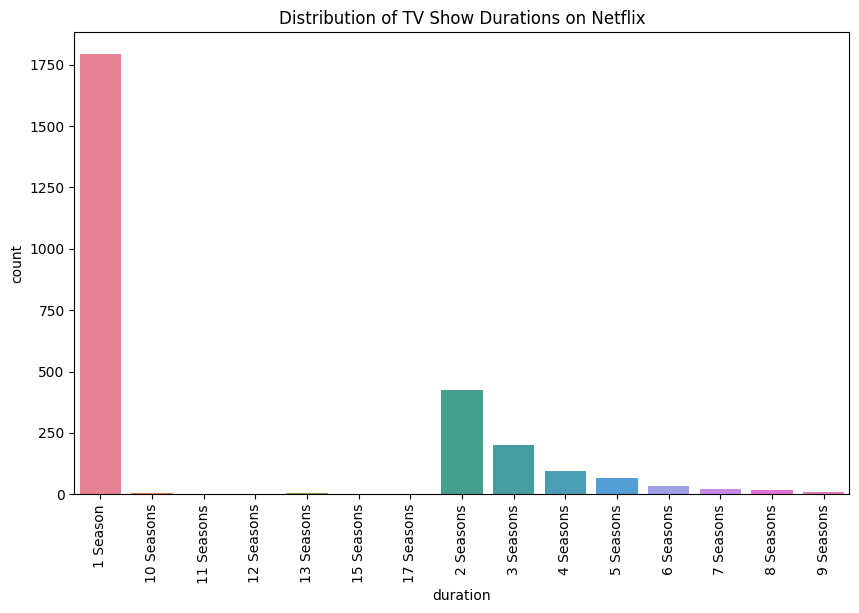

In [52]:
# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Barplot
sns.barplot(data=Netflix_unnested.groupby('type').get_group('TV Show').groupby('duration').agg(count=('title','nunique')),x='duration',y='count',hue='duration')

# Display title
axs.set_title('Distribution of TV Show Durations on Netflix')

# Ticks
plt.xticks(rotation=90)

# Display the plot
plt.show()

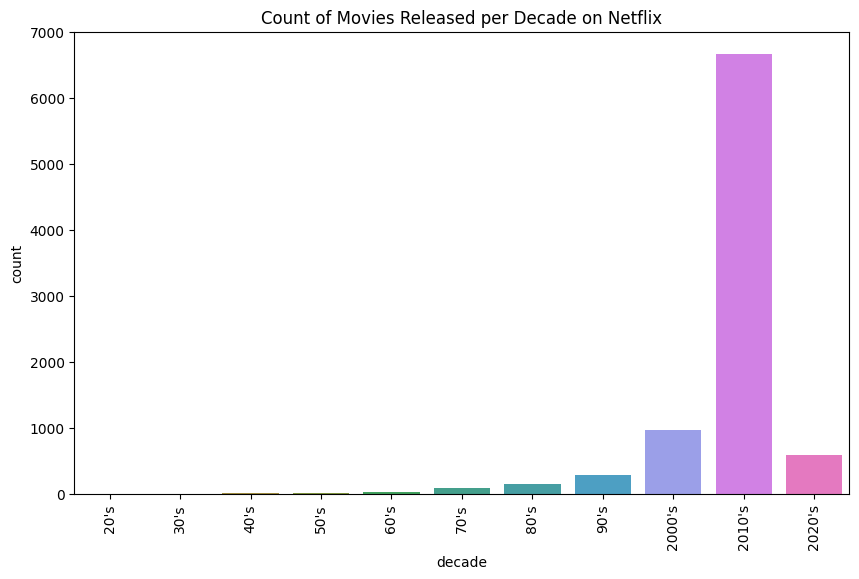

In [53]:
# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Barplot
sns.barplot(data=Netflix_unnested.groupby('decade').agg(count=('title','nunique')).reset_index(),x='decade',y='count',hue='decade')

# Display title
axs.set_title('Count of Movies Released per Decade on Netflix')

# Ticks
plt.xticks(rotation=90)

# Display the plot
plt.show()

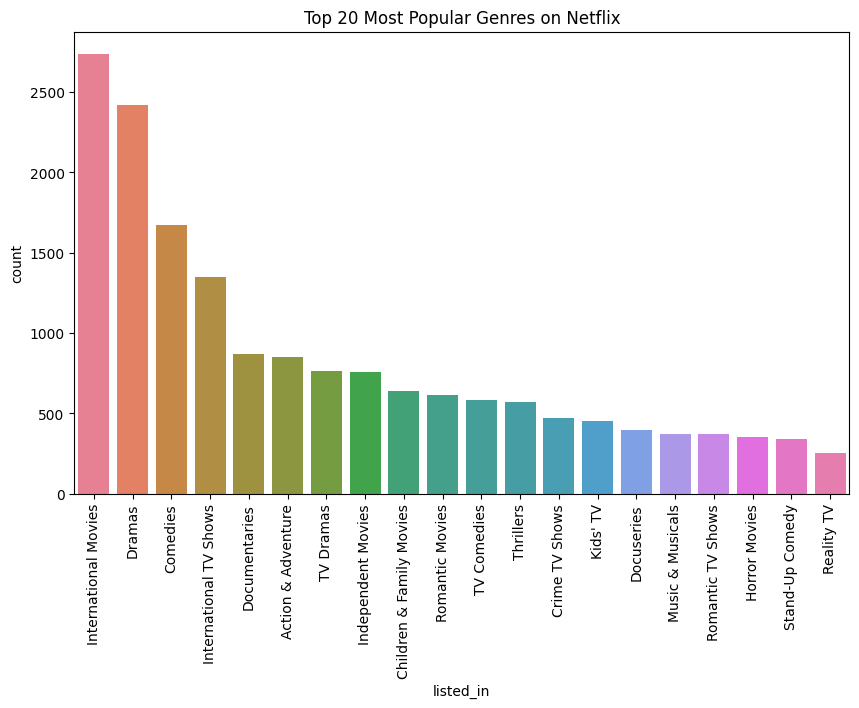

In [55]:
# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Barplot
sns.barplot(data=Netflix_unnested.groupby('listed_in').agg(count=('title','nunique')).nlargest(20,'count'),x='listed_in',y='count',hue='listed_in')

# Display title
axs.set_title('Top 20 Most Popular Genres on Netflix')

# Ticks
plt.xticks(rotation=90)

# Display the plot
plt.show()

A bar plot was crafted to illustrate the distribution of Netflix content across its top 20 genres, showcasing a diverse range of programming to cater to global audiences. The genre leading the chart is "International Movies," with 2,739 titles, emphasizing Netflix’s robust selection of films from around the world, followed closely by "Dramas" with 2,419 titles, highlighting the platform's strong focus on narrative-driven content. "Comedies" and "International TV Shows" also feature prominently, underlining Netflix's commitment to delivering humor and diverse cultural perspectives to its viewers. This visualization provides a clear snapshot of Netflix's strategic emphasis on a variety of content types, aimed at capturing a wide audience with different tastes and preferences. The genres displayed not only reflect the vastness of Netflix’s library but also its global outreach and adaptability in curating content that resonates across different demographics.

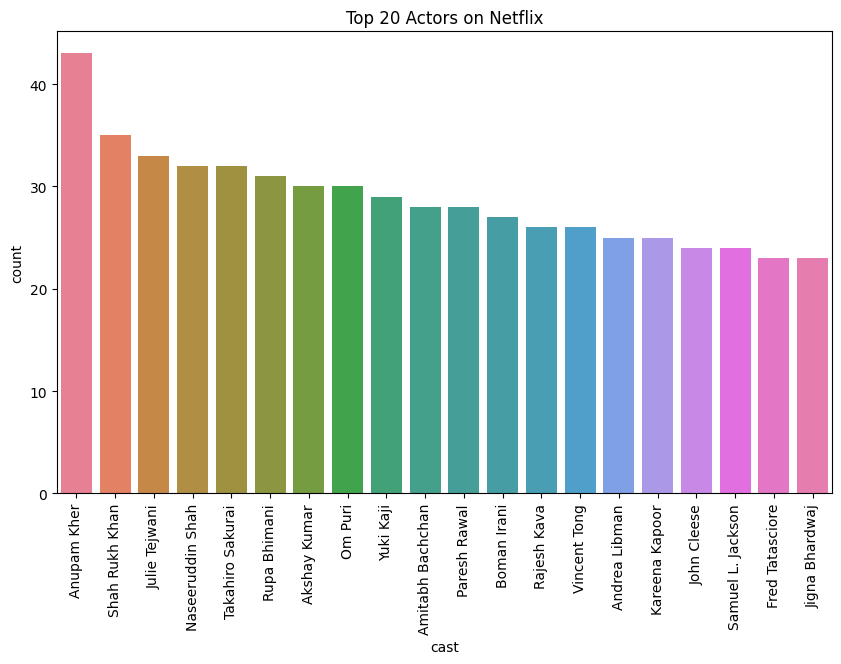

In [69]:
# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Barplot
sns.barplot(data=Netflix_unnested.groupby('cast').agg(count=('title','nunique')).nlargest(21,'count').drop('Unknown Actor'),x='cast',y='count',hue='cast')

# Display title
axs.set_title('Top 20 Actors on Netflix')

# Ticks
plt.xticks(rotation=90)

# Display the plot
plt.show()

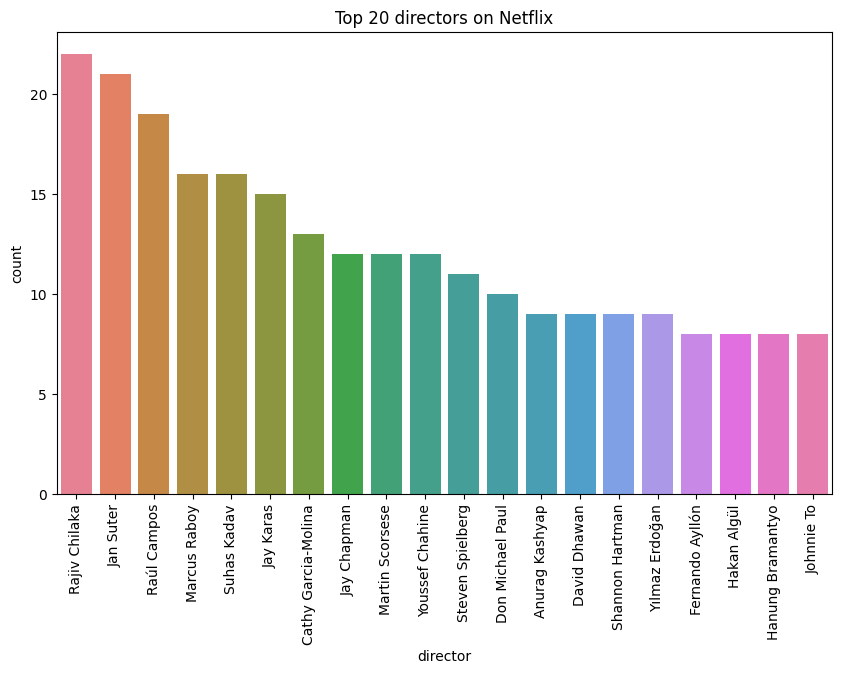

In [68]:
# Create a figure and a single subplot
fig,axs=plt.subplots(figsize=(10,6))

# Barplot
sns.barplot(data=Netflix_unnested.groupby('director').agg(count=('title','nunique')).nlargest(21,'count').drop('Unknown Director'),x='director',y='count',hue='director')

# Display title
axs.set_title('Top 20 directors on Netflix')

# Ticks
plt.xticks(rotation=90)

# Display the plot
plt.show()

The extensive analysis of Netflix's catalog has revealed intriguing patterns in content distribution across genres, directors, and countries. By examining the most frequent actors and directors, as well as the prevailing genres and regional productions, we've identified key areas that warrant further exploration. For instance, deeper investigations could focus on understanding the genre expertise of top directors or evaluating which countries predominantly produce comedies versus dramas. Such targeted analyses could provide valuable insights into global content strategies and viewer preferences, potentially guiding Netflix's future production decisions. This detailed understanding could also help in tailoring content recommendations to diverse audiences, enhancing viewer satisfaction and engagement on the platform. Overall, by diving deeper into each segment, we can uncover nuanced relationships that drive content creation and consumption in the streaming landscape.

# **Insights**


---



*   ***Emphasis on Mature Content***: A significant portion of Netflix's offerings is aimed at mature audiences (TV-MA and R ratings), indicating a strategic focus on adult viewers. This is complemented by a diverse selection aimed at younger audiences and families, showing a broad targeting strategy.
*   ***Trend Towards Movies***: With approximately 70% of the content being movies, Netflix demonstrates a strong inclination towards cinematic content over TV shows. This suggests a strategic bet on the enduring appeal of movies to attract and retain subscribers.
*   ***Global Content Strategy***: The presence of a significant number of international titles, particularly from India and the United States, highlights Netflix's global content strategy. This approach not only caters to a wide array of cultural tastes but also underscores the platform's commitment to presenting a diverse range of storytelling.
*  ***Preference for Contemporary Content***: The distribution of content across different decades, with a significant concentration in the 2010s, reveals Netflix's focus on contemporary content. This is indicative of a strategy to stay relevant and appealing to current viewer preferences and trends.
* ***Strategic Content Addition Timing***: The analysis of content additions by season indicates strategic timing, with peaks during periods of high viewership potential like summer breaks and holiday seasons. This suggests a thoughtful approach to maximizing engagement by aligning content additions with viewer availability.

# **Recommendations**
---


* ***Expand Family and Young Adult Offerings***: Given the heavy focus on mature content, Netflix could further diversify its library by expanding its offerings for families and young adults. This could help capture a broader audience base, including younger viewers and families looking for content suitable for all ages.

* ***Enhance Focus on Serialized Content***: While movies dominate the platform, increasing the investment in TV shows, especially given the trend towards single-season series, could cater to the growing appetite for short, engaging narratives. This would also leverage the binge-watching culture prevalent among digital audiences.

* ***Leverage International Growth Opportunities***: Continue to invest in international content to cater to and grow the global audience. This involves not just adding more international titles but also investing in original productions outside the traditional markets to capture unique narratives and talents.

* ***Innovate in Content Discovery and Recommendation***: Improve content discovery mechanisms to highlight the breadth and depth of the library, especially given the diverse range of genres and international titles. Personalized recommendations and curated collections could help viewers find content that matches their interests more efficiently.

* ***Seasonal and Event-based Content Strategies***: Further refine content addition strategies based on seasonal viewership trends and global events. This could involve thematic content releases that align with holidays, sports events, or even global phenomena to capture audience interest in real-time.

* ***Focus on Niche Genres and Underrepresented Voices***: While mainstream genres dominate, there's an opportunity to further explore niche genres and stories from underrepresented voices and cultures. This could distinguish Netflix in a crowded marketplace by offering unique and diverse perspectives not readily available elsewhere.